# RL-based Autonomous Coordination in Mobile Networks

[mobile-env](https://github.com/stefanbschneider/mobile-env/tree/main) environment allows modeling users moving around an area and can connect to one or multiple base stations. This environment supports multi-agent and centralized reinforcement learning policies.

In the following example: given a number of base stations or cells (BSs) and user equipments (UEs). The objective is to decide what connections should be established among UEs and BSs in order to maximize Quality of Experience (QoE) globally. 

![Mobile Networks](mobile.gif)

To maximize the QoE of single UEs, the UE intends to connect to as many BSs as possible, which yields higher (macro) data rates. However, BSs multiplex resources among connected UEs (e.g. schedule physical resource blocks) and, therefore, UEs compete for limited resources (conflicting goals). To achieve maximum QoE globally, the policy must consider two crucial factors:
* The data rate (DR in GB/s) of each connection is determined by the channel's quality (e.g., Signal-to-Noise Ratio) between the UE and BS.
* The QoE of individual UEs does not necessarily increase linearly with higher data rates.

For more information, see: [mobile-env: An Open Environment for Autonomous Coordination in Mobile Networks](https://github.com/stefanbschneider/mobile-env/tree/main)

<b>Requirements</b>
<br>gymnasium==0.28.1
<br>mobile-env
<br>stable_baselines3==2.0.0
<br>ray==2.6.1

In [1]:
# !pip install mobile-env

In [2]:
import gymnasium
import matplotlib.pyplot as plt
import mobile_env
from IPython import display

### Create environment

create a small/medium/large mobile environment for a single, centralized control agent. Pass rgb_array as render mode so the env can be rendered inside the notebook

|Environment| # of base station (BSs) | # of user equirpment (UEs)| 
|-----|-------|------| 
|mobile-small-central-v0| 3 | 5 |
|mobile-medium-central-v0| 3 | 15 |
|mobile-large-central-v0| 3 | 50 |

In [3]:
env = gymnasium.make("mobile-small-central-v0", render_mode="rgb_array")
print(f"\nSmall environment with {env.NUM_USERS} users and {env.NUM_STATIONS} cells.")


Small environment with 5 users and 3 cells.


### Run the simulation for 10 time steps with random dummy actions

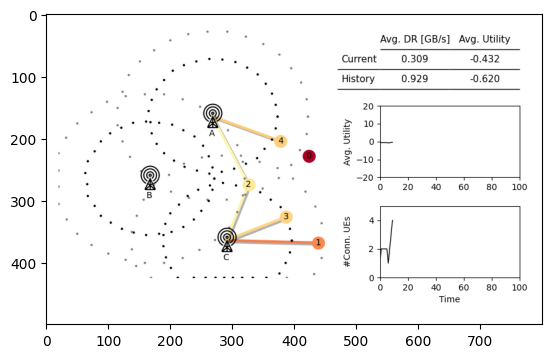

In [4]:
done = False
obs, info = env.reset()
for _ in range(10):
    # Use random dummy actions by sampling from the action space
    dummy_action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(dummy_action)

    # Render the environment
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Centralized RL policy learning

The objective is to train a single centralized PPO agent to learn the optimal policy for mobile network coordination

### Train PPO model

In [6]:
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy

# Train PPO agent on environment
model = PPO(MlpPolicy, env, tensorboard_log='results_sb', verbose=1)
model.learn(total_timesteps=30000, progress_bar=True)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to results_sb\PPO_1


Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 100      |
|    ep_rew_mean     | -42.1    |
| time/              |          |
|    fps             | 54       |
|    iterations      | 1        |
|    time_elapsed    | 37       |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -40.3       |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 2           |
|    time_elapsed         | 73          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014954055 |
|    clip_fraction        | 0.14        |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.92       |
|    explained_variance   | 0.0201      |
|    learning_rate        | 0.0003      |
|    loss                 | 2.23        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0312     |
|    value_loss           | 8.28        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -39.4       |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 3           |
|    time_elapsed         | 108         |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.014039421 |
|    clip_fraction        | 0.0969      |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.91       |
|    explained_variance   | 0.27        |
|    learning_rate        | 0.0003      |
|    loss                 | 1.75        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0283     |
|    value_loss           | 6.77        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -38.6       |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 4           |
|    time_elapsed         | 144         |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.012987261 |
|    clip_fraction        | 0.0969      |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.89       |
|    explained_variance   | 0.252       |
|    learning_rate        | 0.0003      |
|    loss                 | 2.36        |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0279     |
|    value_loss           | 6.69        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -38.2       |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 5           |
|    time_elapsed         | 180         |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.014896974 |
|    clip_fraction        | 0.139       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.87       |
|    explained_variance   | 0.275       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.994       |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0316     |
|    value_loss           | 4.58        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -37.6       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 6           |
|    time_elapsed         | 215         |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.014802901 |
|    clip_fraction        | 0.131       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.85       |
|    explained_variance   | 0.359       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.64        |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.0303     |
|    value_loss           | 4.49        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -36.5       |
| time/                   |             |
|    fps                  | 57          |
|    iterations           | 7           |
|    time_elapsed         | 251         |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.015972208 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.82       |
|    explained_variance   | 0.356       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.47        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.0354     |
|    value_loss           | 3.82        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -35.5       |
| time/                   |             |
|    fps                  | 56          |
|    iterations           | 8           |
|    time_elapsed         | 292         |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.015602961 |
|    clip_fraction        | 0.144       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.8        |
|    explained_variance   | 0.537       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.35        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0355     |
|    value_loss           | 3.57        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -34.7       |
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 9           |
|    time_elapsed         | 332         |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.016549902 |
|    clip_fraction        | 0.149       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.77       |
|    explained_variance   | 0.337       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.968       |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0359     |
|    value_loss           | 4.05        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -32.9       |
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 10          |
|    time_elapsed         | 371         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.016024891 |
|    clip_fraction        | 0.15        |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.73       |
|    explained_variance   | 0.443       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.33        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0365     |
|    value_loss           | 3.57        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -31.3       |
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 11          |
|    time_elapsed         | 409         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.015888736 |
|    clip_fraction        | 0.162       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.7        |
|    explained_variance   | 0.433       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.59        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0388     |
|    value_loss           | 3.98        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 100        |
|    ep_rew_mean          | -30.3      |
| time/                   |            |
|    fps                  | 54         |
|    iterations           | 12         |
|    time_elapsed         | 449        |
|    total_timesteps      | 24576      |
| train/                  |            |
|    approx_kl            | 0.01624172 |
|    clip_fraction        | 0.155      |
|    clip_range           | 0.2        |
|    entropy_loss         | -6.67      |
|    explained_variance   | 0.37       |
|    learning_rate        | 0.0003     |
|    loss                 | 1.02       |
|    n_updates            | 110        |
|    policy_gradient_loss | -0.0387    |
|    value_loss           | 3.11       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -29.8       |
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 13          |
|    time_elapsed         | 485         |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.016152699 |
|    clip_fraction        | 0.169       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.62       |
|    explained_variance   | 0.344       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.06        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0387     |
|    value_loss           | 3.49        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -29.1       |
| time/                   |             |
|    fps                  | 54          |
|    iterations           | 14          |
|    time_elapsed         | 522         |
|    total_timesteps      | 28672       |
| train/                  |             |
|    approx_kl            | 0.015456637 |
|    clip_fraction        | 0.156       |
|    clip_range           | 0.2         |
|    entropy_loss         | -6.59       |
|    explained_variance   | 0.446       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.13        |
|    n_updates            | 130         |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 3.39        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 100          |
|    ep_rew_mean          | -29          |
| time/                   |              |
|    fps                  | 54           |
|    iterations           | 15           |
|    time_elapsed         | 559          |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0142461825 |
|    clip_fraction        | 0.126        |
|    clip_range           | 0.2          |
|    entropy_loss         | -6.55        |
|    explained_variance   | 0.526        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.8          |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.0327      |
|    value_loss           | 4.7          |
------------------------------------------


### Render the environment state after training

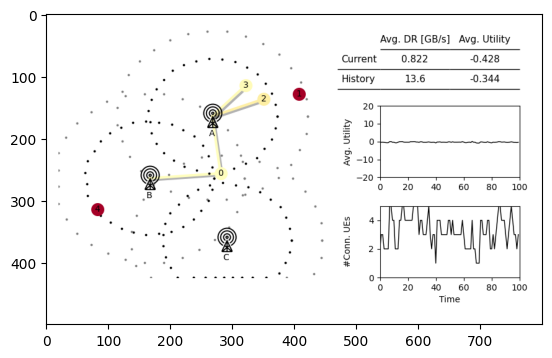

In [7]:
obs, info = env.reset()
done = False

# Run one episode with the trained model
while not done:
    action, _ = model.predict(obs)

    # Perform step on simulation environment
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # Render environment as RGB
    plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Observed features

Handlers define the observation and action spaces as well as the reward for an environment. Hence, when designing a new Markov Decision Process for a reinforcement learning approach, you can quickly validate it by implementing a new handler in mobile-env.

By default, observed features are:
* The current connections between users and cells (binary)
* The signal-to-noise-ratio (SNR) between all users and cells (normalized to [0,1])
* The current utility (i.e., QoE) of each user (normalized to [-1,1])

In [8]:
env.handler.features

['connections', 'snrs', 'utility']

### Print observations

In [9]:
obs, info = env.reset(seed=42)
obs, reward, terminated, truncated, info = env.step(env.action_space.sample())

print("Raw observations: ", obs)

# Connections and SNR are per user and station, utility just per user
obs_per_user = 2 * env.NUM_STATIONS + 1
for ue in range(env.NUM_USERS):
    print(f"\nObservations for user {ue + 1}:")
    offset = ue * obs_per_user
    print(f"Current connections to the {env.NUM_STATIONS} cells: {obs[offset:offset+env.NUM_STATIONS]}")
    print(f"SNR to the {env.NUM_STATIONS} cells: {obs[offset+env.NUM_STATIONS:offset+2*env.NUM_STATIONS]}")
    print(f"Current utility: {obs[offset+2*env.NUM_STATIONS]}")

Raw observations:  [ 0.          0.          0.          0.695659    0.27095294  1.
 -1.          0.          0.          0.          1.          0.37211105
  0.07161748 -1.          0.          0.          1.          0.09645249
  0.091206    1.         -0.26507846  0.          0.          0.
  1.          0.5671929   0.08269141 -1.          0.          0.
  0.          1.          0.23271252  0.44786757 -1.        ]

Observations for user 1:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [0.695659   0.27095294 1.        ]
Current utility: -1.0

Observations for user 2:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [1.         0.37211105 0.07161748]
Current utility: -1.0

Observations for user 3:
Current connections to the 3 cells: [0. 0. 1.]
SNR to the 3 cells: [0.09645249 0.091206   1.        ]
Current utility: -0.26507845520973206

Observations for user 4:
Current connections to the 3 cells: [0. 0. 0.]
SNR to the 3 cells: [1.         0.56719